![Astrofisica Computacional](../logo.PNG)

---
## 02. Spectral Methods. 1D  Non-Linear Advection Equation 

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebook we use some spectral methods to solve the 1-dimensional non-linear advection equation (Burger's equation).


---
## The Non-Linear 1D Advection Equation (Burger's equation) and the Spectral Methods

Now we will solve the 1-dimensional non-linear advection equation known as Burguer's equation,

\begin{equation}
\partial_t \psi + \psi \partial_x \psi = 0.
\end{equation}


The pseudo-spectral  method will solve the problem in the physical space but evaluates the spatial derivative in the spectral space. This idea is implemented by considering the spectral decomposition of the function $\psi$,

\begin{equation}
\psi (t,x)= \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t)e^{\frac{2\pi i k x}{L}},
\end{equation} 

which gives

\begin{equation}
\frac{\partial \psi (t,x)}{\partial x} = \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k x}{L}}. 
\end{equation}


Then, Burger's equation becomes

\begin{equation}
\partial_t \psi = - \psi \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k x}{L}}
\end{equation}

and we evaluate it at the grid points $x_j$ to obtain

\begin{equation}
\partial_t \psi_j = - \psi_j \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} a_k(t) \frac{2\pi i k}{L}  e^{\frac{2\pi i k j}{N}}.
\end{equation}

Writing the coeffcients as a DFT, i.e. $a_k (t) = F_k \left[\psi (t) \right]$, we obtain 

\begin{equation}
\partial_t \psi_j = - \psi_j \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} F_k \left[\psi (t) \right] \frac{2\pi i k}{L}  e^{\frac{2\pi i k j}{N}}.
\end{equation}

Re-organizing terms,

\begin{equation}
\partial_t \psi_j = - \psi_j \sum_{k=-\left(\frac{N}{2}-1\right)}^{\frac{N}{2}} \left(  \frac{2\pi i k}{L} F_k \left[\psi (t) \right] \right)  e^{\frac{2\pi i k j}{N}},
\end{equation}

we recognize an iDFT in the right hand side, 

\begin{equation}
\partial_t \psi_j = - \psi_j F_j^{-1} \left[ \frac{2\pi i k}{L} F_k \left[\psi (t) \right] \right]
\end{equation}



---

### Implementation of the Solution

We will use, as an example, an initial sinusoidal profile and the integration will be done using the `odeint` function.

/Users/eduard/miniforge3/envs/ashcat/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


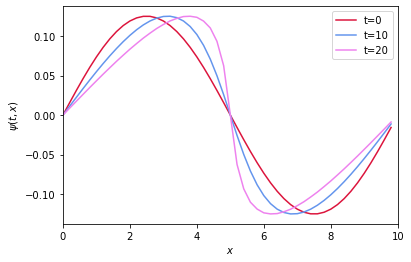

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft
from scipy.integrate import odeint


# Definition of the initial Sin profile
def sinProfile(x):
    return (1/8.)*np.sin(2*np.pi*x/L)


def ODE(u, t):
    N = len(u)
    k = np.arange(N)
    k[int(N/2)+1:]-= N
    return -u*ifft(2*np.pi*1j*k/L*fft(u)).real


# spatial grid definition
xi = 0.
xf = 10.
L   = xf - xi

nx  = 50 # number of spatial nodes
dx = L/nx     # not L/(nx-1)
x = np.arange(0., L, dx) 

psi0 = sinProfile(x)


#---------- solve the problem and plot
t = np.linspace(0,50,100)
psi = odeint(ODE, psi0, t)


fig,ax=plt.subplots()
ax.plot(x, psi[0,:], color='crimson', label='t=0')
ax.plot(x, psi[10,:], color='cornflowerblue', label='t=10')
ax.plot(x, psi[20,:], color='violet', label='t=20')
    
plt.xlim([0,10])
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(t,x)$')
plt.legend()
plt.show()

/Users/eduard/miniforge3/envs/ashcat/lib/python3.9/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


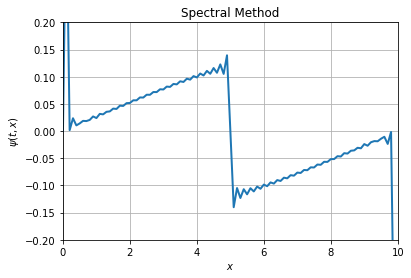

In [2]:
from matplotlib import animation
from IPython.display import HTML

nx  = 100
dx = L/nx     # not L/(nx-1)
x = np.arange(0., L, dx) 
psi0 = sinProfile(x)

t = np.linspace(0,50,100)
psi = odeint(ODE, psi0, t)


# Set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.title('Spectral Method')
ax.set_xlim(( 0, 10))
ax.set_ylim((-0.2, .2))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\psi(t,x)$')
plt.grid()

line, = ax.plot([], [], lw=2)

# Define the initialization function, which plots the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    xp = x
    yp = psi[i,:] 
    line.set_data(xp, yp)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50,
                               interval=20, # only 10 frames with a duration of 20 ms each
                               blit=True)

HTML(anim.to_jshtml())
